# Visualize Cross-Prediction Results

This script visualizes the cross-prediction results onto six 2x2 matrices. By visualizing the results on matrices instead of a table, it's easier to determine which WISC measures can be cross-predicted and which results are significant.

In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper",
    style="whitegrid",
    font_scale=1.2,
    rc={'figure.figsize': (10, 7), 'figure.dpi': 300}
)

mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.facecolor'] = 'white'
mpl.rcParams['savefig.bbox'] = 'tight'

from common.paths import CROSS_PRED_RESULTS, IMAGES
from common.wisc import WISC_LEVEL
from common.results import load_results
from os.path import join

## Get Results

In [2]:
fn = 'ridge_pts_age_cross_prediction (consistent)'
df, results_path = load_results(fn, CROSS_PRED_RESULTS)

# If we want to ignore Bin 3
df = df[df['Train'] != 'Bin 3']
df = df[df['Test'] != 'Bin 3']

display(df)

,Model,Target,Train,Test,Score,P-value,Population,Num Permutations,FDR,Uncorrected,BFR
0,ridge,WISC_FSIQ,Bin 1,Bin 1,0.265258,0.019960,adhd,500,True,True,False
1,ridge,WISC_FSIQ,Bin 1,Bin 2,0.328246,0.001996,adhd,500,True,True,False
3,ridge,WISC_FSIQ,Bin 2,Bin 2,0.351665,0.001996,adhd,500,True,True,False
5,ridge,WISC_FSIQ,Bin 2,Bin 1,0.358564,0.001996,adhd,500,True,True,False
9,ridge,WISC_VSI,Bin 1,Bin 1,0.244930,0.017964,adhd,500,True,True,False
10,ridge,WISC_VSI,Bin 1,Bin 2,0.360013,0.001996,adhd,500,True,True,False
12,ridge,WISC_VSI,Bin 2,Bin 2,0.208465,0.021956,adhd,500,True,True,False
14,ridge,WISC_VSI,Bin 2,Bin 1,0.404534,0.001996,adhd,500,True,True,False
18,ridge,WISC_VCI,Bin 1,Bin 1,0.223335,0.027944,adhd,500,False,True,False
19,ridge,WISC_VCI,Bin 1,Bin 2,0.316121,0.001996,adhd,500,True,True,False


/tmp/ipykernel_632331/214467822.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


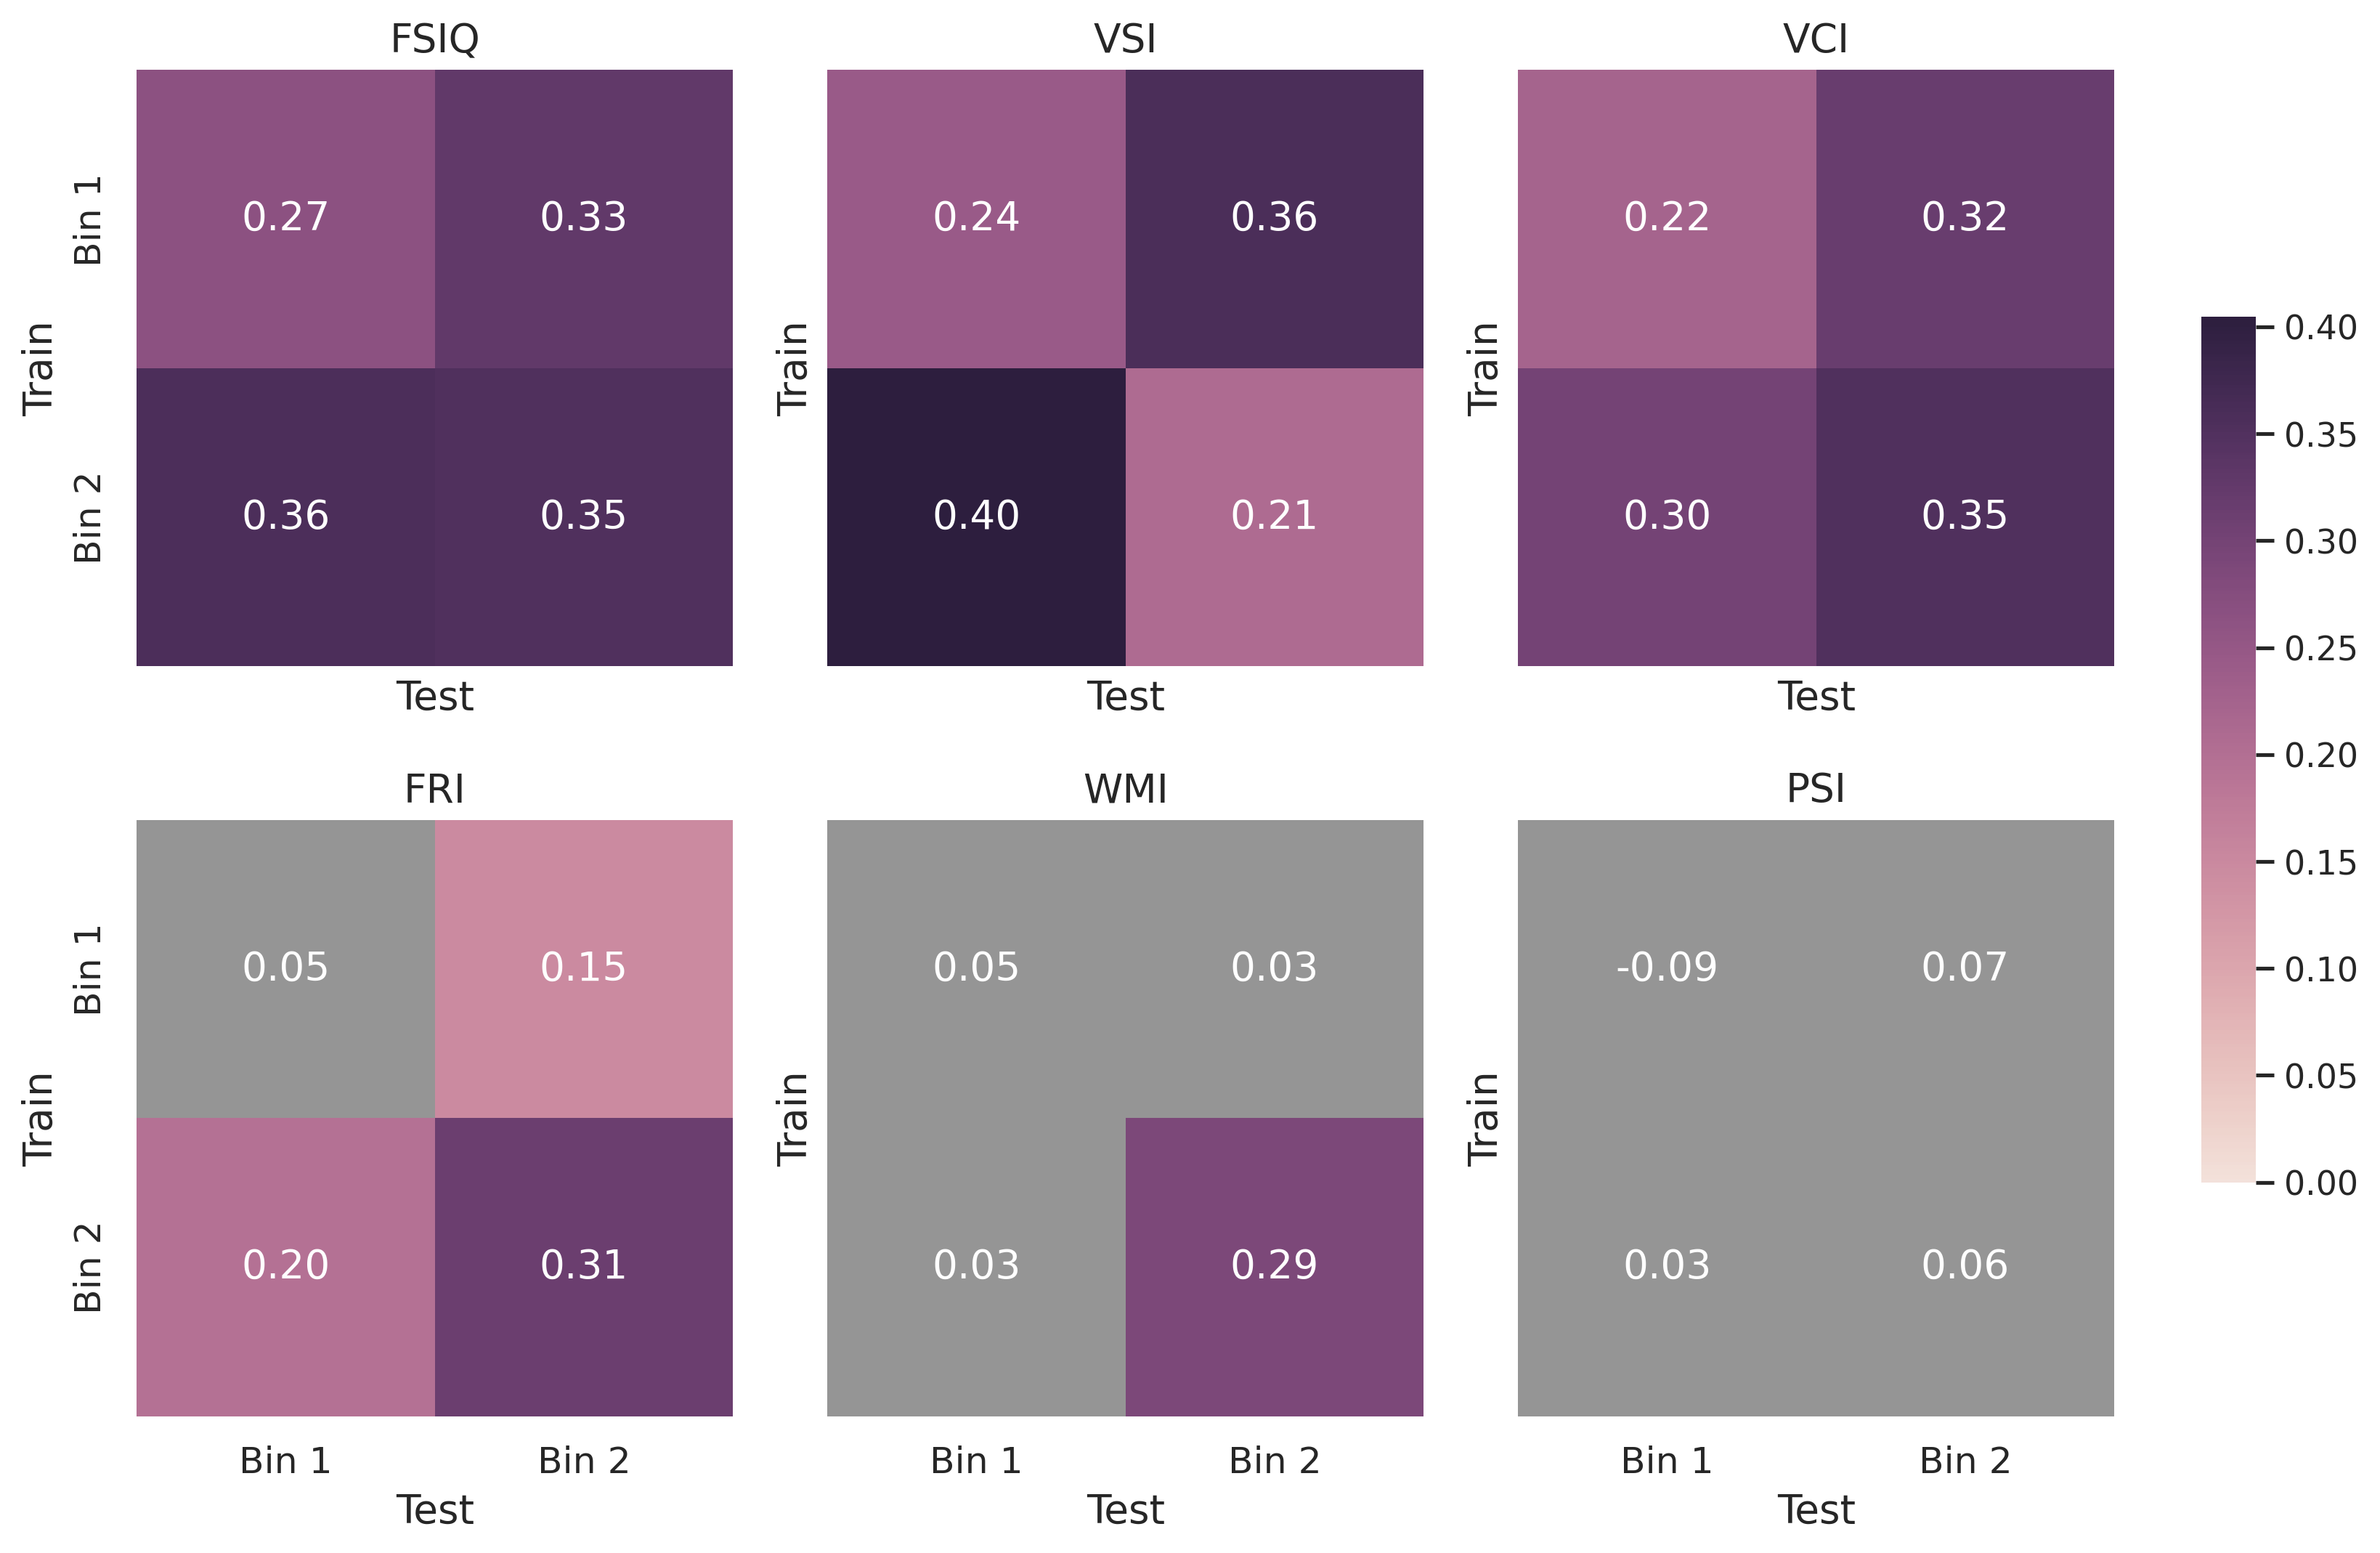

In [5]:
multiple_correction_col = 'Uncorrected'
vmax = df['Score'].max()

fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True)
cmap = sns.cubehelix_palette(as_cmap=True, light=.9)
sns.set(font_scale=1.1)

for idx, measure in enumerate(WISC_LEVEL[5]):
    df_measure = df[df['Target'] == measure]
    scores = df_measure.pivot('Train', 'Test', 'Score')
    correction = df_measure.pivot('Train', 'Test', multiple_correction_col)
    ax = axs[idx // 3][idx % 3]
    ax.set_title(f'{measure[5:]}')
    
    purp_ax = sns.heatmap(scores, annot=True, fmt=".2f", mask=~correction, ax=ax, cmap=cmap,
                     vmin=0, vmax=vmax, square=True, cbar=False)
    gray_ax = sns.heatmap(scores, annot=True, fmt=".2f", mask=correction, ax=ax, cbar=False,
                     cmap=sns.color_palette("Greys", n_colors=1, desat=1), square=True)

# Add legend stating gray isn't significant
# colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
# texts = [r"n.s. at $\alpha$=0.05"]
# patches = [mpatches.Patch(color=colors[i], label=str(texts[i])) for i in range(len(texts))]
# plt.legend(handles=patches, bbox_to_anchor=(.95, 1.05), loc='center')

fig.subplots_adjust(right=0.8)

# [left, bottom, width, height]
cbar_ax = fig.add_axes([axs[1][2].get_position().x1 + .22, 
                        axs[1][2].get_position().y0 + .09, 
                        0.025,
                        (axs[0][2].get_position().y1 - axs[0][2].get_position().y0) * 2])

cbar = fig.colorbar(mpl.cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=0, vmax=vmax), cmap=cmap), cax=cbar_ax)
cbar.ax.tick_params(labelsize=11)
cbar.outline.set_visible(False)

fig.tight_layout()
fig.subplots_adjust(hspace=0.2)

fig.savefig(join(IMAGES, 'Cross Prediction', 'Standard Scaled', 
                 'Age All Measures (Uncorrected, No Bin 3) updated.svg'), 
            format='svg')

plt.show()